# Principal Component Analysis via Singular Value Decomposition

### Libraries Import

In [152]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import linalg
import pandas as pd
import numpy as np

### Data Processing

In [136]:
# Running the data generation script
%run data_generation.py

# Loading the dataset
df = pd.read_csv("data.csv")

# Extracting the matrix
X = df.values
N, D = X.shape

Success: data.csv was generated.
Dimensions: 100 samples with 10 features.


### Feature Correlation Heatmap

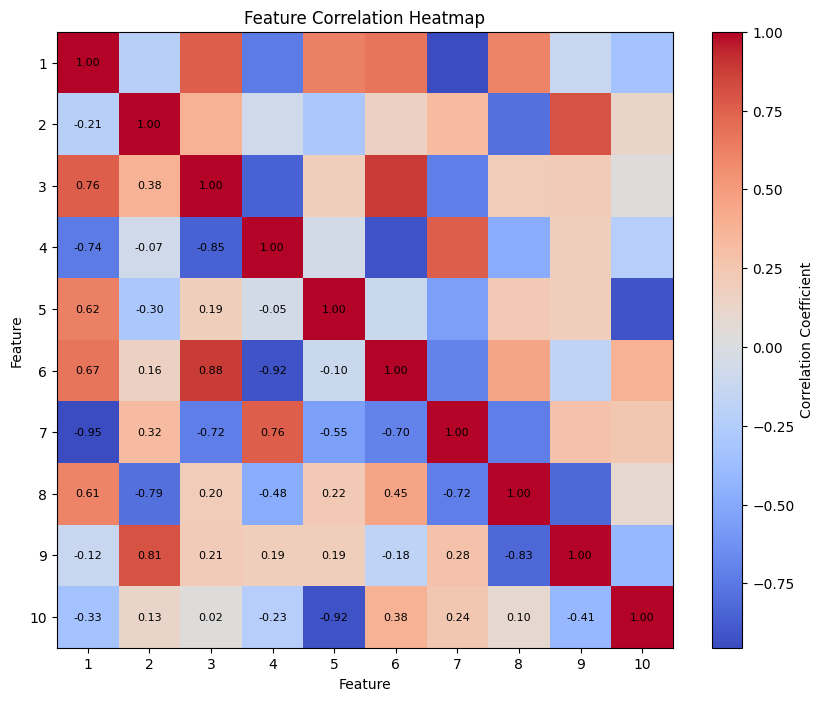

In [ ]:
# Calculating the correlation matrix
corr_matrix = df.corr()
D = corr_matrix.shape[0]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
# Use Matplotlib's imshow to display the matrix
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation Coefficient")

# Set axis labels and title
plt.title("Feature Correlation Heatmap")

# Create simple numeric labels (1, 2, ..., D)
numeric_labels = [i + 1 for i in range(D)]

# Set the tick labels to be 1 to 10 on both axes
plt.xticks(range(D), numeric_labels, rotation=0)
plt.yticks(range(D), numeric_labels)

# Add single axis labels
plt.xlabel("Feature")
plt.ylabel("Feature")

# Optional: Annotate the cells with correlation values for clarity
for i in range(D):
    for j in range(D):
        # We only annotate the lower triangle or above the diagonal to avoid clutter
        if i >= j:
            text = plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}",
                           ha="center", va="center", color="black", fontsize=8)

plt.show()

### Matrix Centering

In [138]:
# Computing the mean vectors for each feature
mu = np.mean(X, axis=0)

# Constructing the centered matrix X_c
X_c = X - mu

print("Centered matrix shape:", X_c.shape)

Centered matrix shape: (100, 10)


### Singular Value Decomposition

In [139]:
# Computing economic SVD
U, S, Vt = linalg.svd(X_c, full_matrices=False)

print("U shape:", U.shape)
print("V^T shape:", Vt.shape)
print("\nSingular Values:")
print(S)

U shape: (100, 10)
V^T shape: (10, 10)

Singular Values:
[553.64241283 327.21503756 291.62151035  36.36766965  33.37532084
  33.0206276   29.8213306   27.86925402  23.638004    20.50301605]


### Eigenvalues Calculation

In [140]:
# Calculating the Eigenvalues
eigenvalues = (S ** 2) / (N - 1)

print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[3096.16082111 1081.51192735  859.02126564   13.35967067   11.25163678
   11.01375603    8.98294706    7.84540727    5.64399226    4.24619866]


### Explained Variance Ratio Calculation

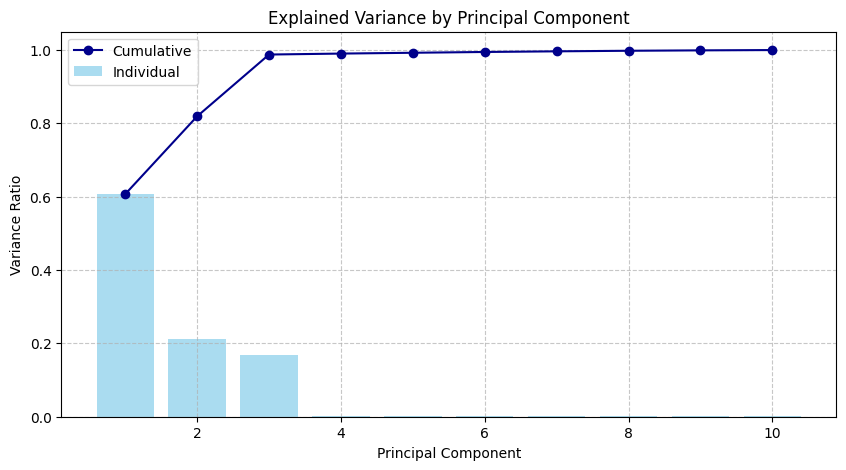

Component 1: 0.6072 cumulative variance
Component 2: 0.8193 cumulative variance
Component 3: 0.9878 cumulative variance
Component 4: 0.9904 cumulative variance
Component 5: 0.9926 cumulative variance
Component 6: 0.9948 cumulative variance
Component 7: 0.9965 cumulative variance
Component 8: 0.9981 cumulative variance
Component 9: 0.9992 cumulative variance
Component 10: 1.0000 cumulative variance


In [141]:
# Calculating explained variance ratio
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting
plt.figure(figsize=(10, 5))
components = range(1, D + 1)

# Bar chart for individual explained variance
plt.bar(components, explained_variance_ratio, label="Individual", alpha=0.7, color="skyblue")

# Line chart for cumulative variance
plt.plot(components, cumulative_variance, marker="o", color="darkblue", label="Cumulative")

plt.title("Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Print cumulative values
for i, val in enumerate(cumulative_variance):
    print(f"Component {i+1}: {val:.4f} cumulative variance")

### Subspace Projection

Projected data shape: (100, 3)


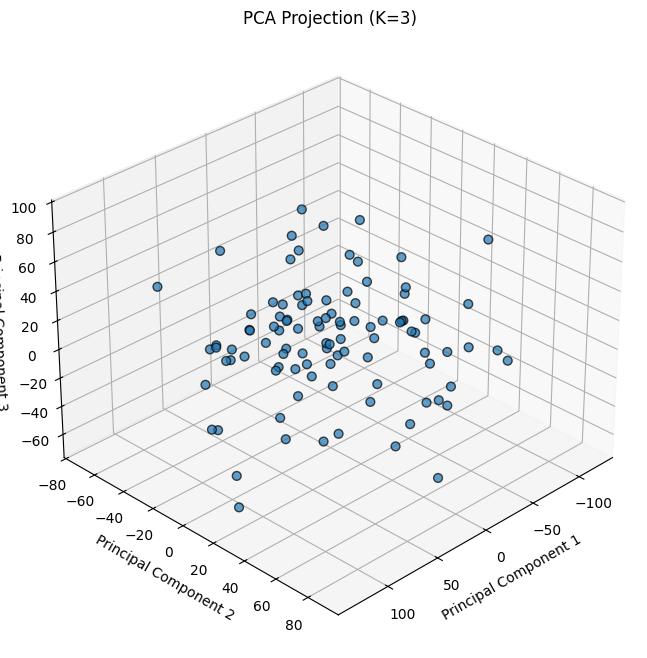

In [164]:
# Select K = 3 for 3D visualization
K = 3

# V^T contains the principal components as rows.
# We need columns, so we transpose V^T back to V.
V = Vt.T 
# (Assuming Vt is available from the SVD step, which is required)

# Form the projection matrix W using the first K columns
W_k = V[:, :K]

# Project the data
T_k = np.dot(X_c, W_k)

print(f"Projected data shape: {T_k.shape}")

# Visualization of the first 3 Principal Components

fig = plt.figure(figsize=(10, 8))
# Add a 3D subplot
ax = fig.add_subplot(111, projection="3d")

# Scatter plot in 3D (PC1, PC2, PC3)
ax.scatter(T_k[:, 0], T_k[:, 1], T_k[:, 2], s=40, alpha=0.7, edgecolors="k")

# Set titles and labels
ax.set_title(f"PCA Projection (K={K})")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Optional: Set view angle for better visualization
ax.view_init(elev=30, azim=45)

plt.show()